In [12]:
import numpy as np
import matplotlib.pyplot as plt


In [13]:
lmax = 2000
Tcmb  = 2.726e6    # CMB temperature in microkelvin?
rlmin, rlmax = 2, 2000 # CMB multipole range for reconstruction
nside = 2048
bstype = 'equi'
nsims = 448 # Number of simulations to average over (in sets of 3) 
ellmin = 2 
ellmax = 2000 ##### check!!!! vs sims
ls, cl_unl, cl_len, cl_phi = np.loadtxt('/home/amb257/kappa_bispec/make_sims_parallel/camb_lencl_phi.txt')
L_lots = np.arange(rlmax+1)
Lfac = (L_lots*(L_lots+1.) / 2 )**2
lcl = cl_len[0:rlmax+1] / Tcmb**2
print('lcl not interp', lcl[lmax])
ucl = cl_unl[0:rlmax+1] / Tcmb**2 #dimless unlensed T Cl
cl_kappa = Lfac * cl_phi[0:rlmax+1]
l_bins = np.arange(0,100,10)
cl_where = cl_kappa[l_bins]
print(cl_where)

lcl not interp 4.6554353095210565e-17
[0.00000000e+00 1.66870490e-07 2.06031272e-07 2.17543630e-07
 2.17004910e-07 2.10657754e-07 2.01537811e-07 1.91161657e-07
 1.80472047e-07 1.69897924e-07]


Text(0, 0.5, 'N2')

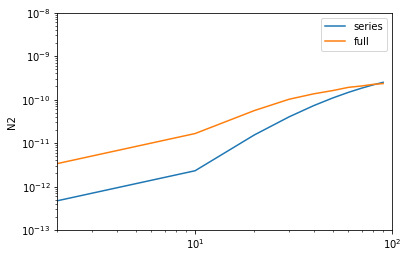

In [14]:
L, out = np.loadtxt('SERIES_lowLN2_out.txt')
L, full_int_out = np.loadtxt('lowLN2_out.txt')
plt.loglog(L, out, label = 'series')
plt.plot(L, full_int_out, label = 'full')
plt.xlim(2,100)
plt.ylim(1e-13,1e-8)
plt.legend()
plt.ylabel('N2')
#plt.yscale('log')

[-8.27360357e-15 -3.59263020e-16 -1.05522874e-15 ... -1.18368704e-14
 -1.39742755e-14 -1.47027124e-14]
6.338676424888803e-11


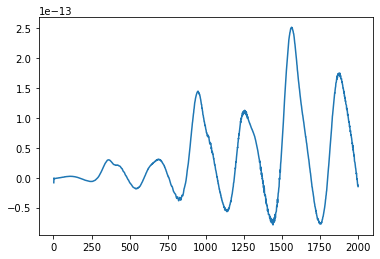

In [15]:
L, int = np.loadtxt('series_integrand.txt')
plt.plot(L, int)
print(int)
print(np.sum(int))

[0.00000000e+00 7.61557527e-16 3.48602614e-16 1.85008822e-16
 1.07790767e-16 6.69736299e-17 4.36743693e-17 2.95744581e-17
 2.06729166e-17 1.48383381e-17]


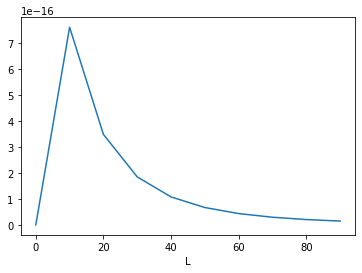

In [16]:
L, direct_int = np.loadtxt('new_direct_sum_integeral.txt')
#L, direct_int = np.loadtxt('integral_direct_sum_10.0.txt')
plt.plot(L, direct_int)
plt.xlabel('L')
print(direct_int)

(20, 1000)

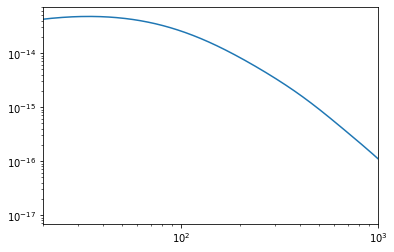

In [17]:
plt.loglog(L_lots, cl_kappa**2)
plt.xlim(20,1000)

/home/amb257/.conda/envs/cmplx_fld_lensplus/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
/home/amb257/.conda/envs/cmplx_fld_lensplus/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


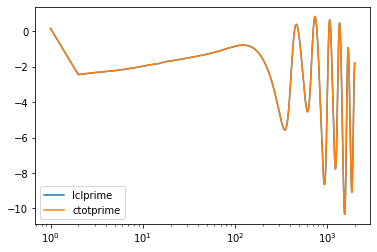

In [18]:
L, ctotprime = np.loadtxt('ctotprime.txt')
L, lclprime = np.loadtxt('lclprime.txt')
L, lcldoubleprime = np.loadtxt('lcldoubleprime.txt')
L, lcl = np.loadtxt('lcl.txt')
L, ocl = np.loadtxt('ocl.txt')
plt.plot(L, L* lclprime / lcl, label='lclprime')
plt.plot(L, L* ctotprime / lcl, label = 'ctotprime')
plt.xscale('log')
plt.legend()

/home/amb257/.conda/envs/cmplx_fld_lensplus/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


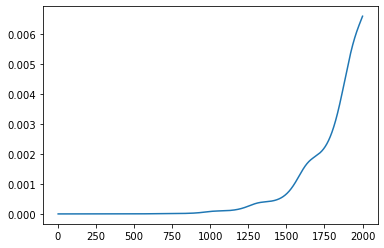

In [19]:
plt.plot(L, L* ctotprime / lcl - L* lclprime / lcl)

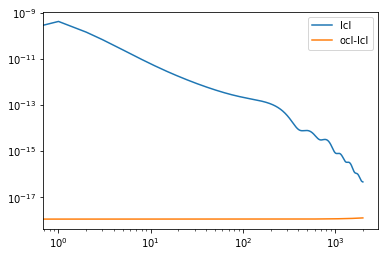

In [20]:
plt.loglog(L, lcl, label = 'lcl')
plt.loglog(L, ocl-lcl, label = 'ocl-lcl')
plt.legend()

In [21]:
print(lcl[0:2])
print(ocl[0:2])

[0.00000000e+00 4.19210004e-10]
[1.13867696e-18 4.19210005e-10]


/home/amb257/.conda/envs/cmplx_fld_lensplus/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


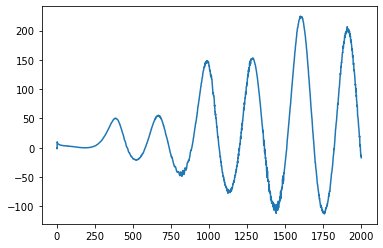

In [22]:
plt.plot(L, L**2 / lcl * lcldoubleprime)